## Markov Chain Analysis and Simulation using Python

**Example 1**: Recall the Markov Model involving weather from class.

There were two states, rain and sun. The transition model was given to relate the probabilities involved in transitioning between these states.

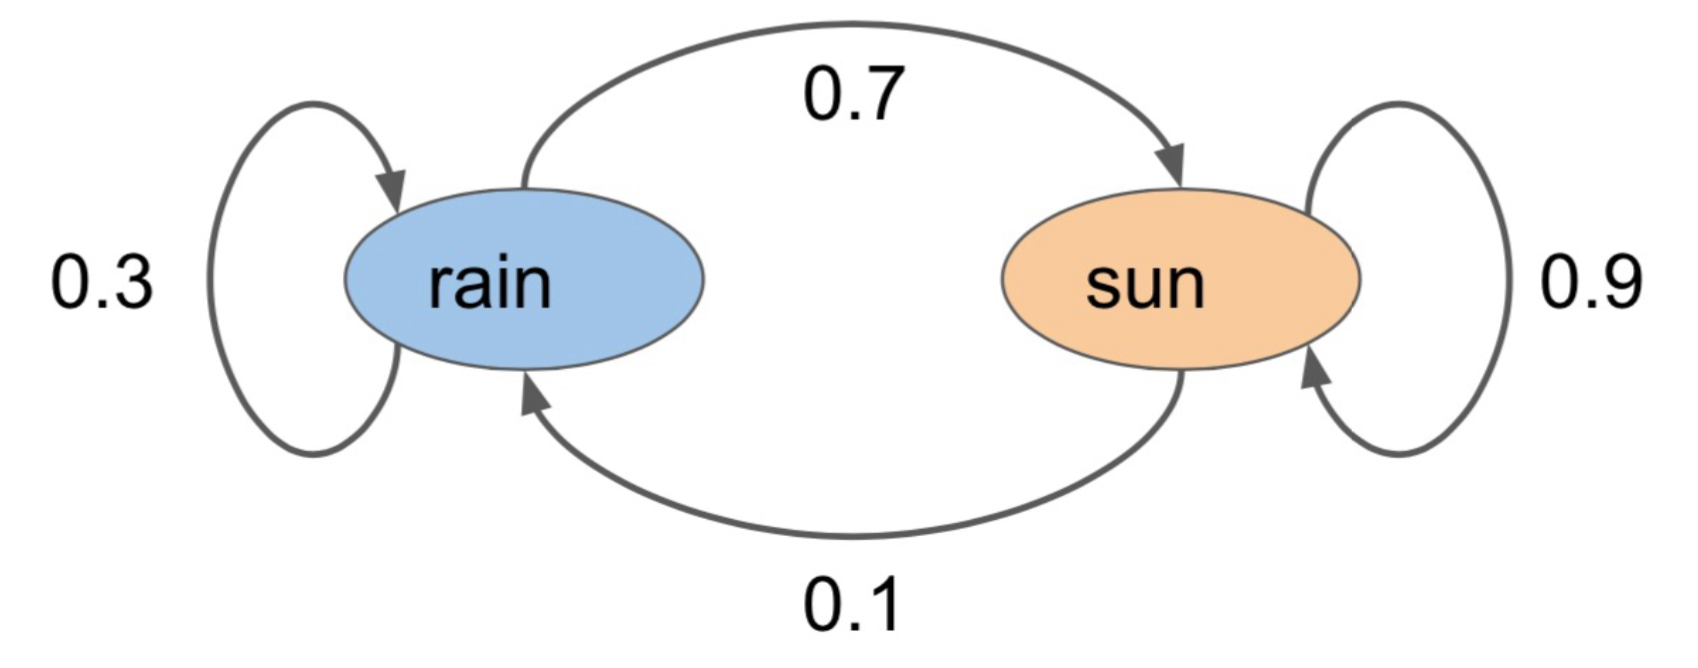


Compute the long run probability of sun and the long run probability of rain.


**Example 2:** See the example of a first order Markov chain below. A Markov chain moves from one state to another with probability given by a transition matrix. A first order Markov chain means that each state is only dependent on the previous state.

<div>
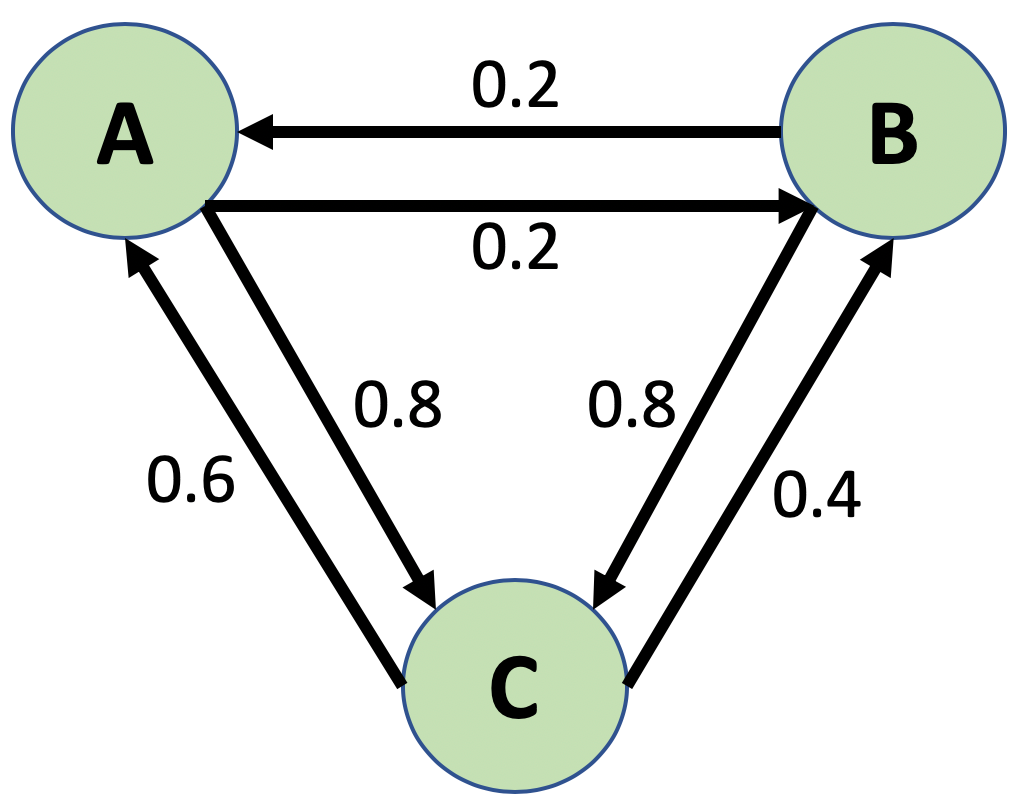
</div>



The transition matrix is given by:

\begin{bmatrix}
0 & 0.2 & 0.8 \\
0.2 & 0 & 0.8 \\
0.6 & 0.4 & 0 \\
\end{bmatrix}

Let's find the stationary distribution for this problem.  We can say that the Markov chain has reached its stationary distribution if $P(X_t) = P(X_{t+1})$. It is common to call the stationary distribution $\pi$. You can think of the stationary distribution as the fraction of time that the system spends in each state as the number of samples approaches infinity. The stationary distribution is a valid probability distribution, and as such must sum to 1. Note that the values for A, B, anc C that the graph approaches below do sum to 1 (or they would if we ran infinite iterations).

[0.31481904 0.24074286 0.4444381 ]


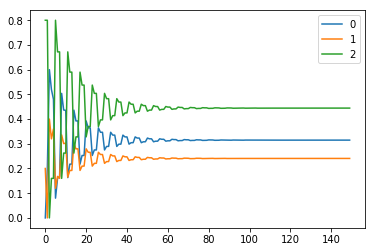

In [15]:
import numpy as np
import pandas as pd


transition_matrix = np.array([[0,0.2,0.8],[0.2,0,0.8],[0.6,0.4,0]])

new = transition_matrix
StatePlot = new
dfStatePlot = pd.DataFrame(new)

for k in range(1,50):
    new = np.matmul(new, transition_matrix)
    
    StatePlot = np.append(StatePlot,new,axis=0)

    dfDistribution = pd.DataFrame(StatePlot)

print(new[0])

dfDistribution.plot()
    

Let's verify this analytically. 


Above, we said that the way to recognize a stationary distribution was to have $P(X_t) = P(X_{t+1})$. More formally, this means that $\pi(x') = \sum_x q(x' | x) \pi(x) $.

In the context of our scenario, this yields the following equations:
$P_{\infty}(A) = P(A|B)P_{\infty}(B)+P(A|C)P_{\infty}(C) $ 

$P_{\infty}(B) = P(B|A)P_{\infty}(A)+P(B|C)P_{\infty}(C) $

$P_{\infty}(C) = P(C|A)P_{\infty}(A)+P(C|B)P_{\infty}(B) $

Additionally, since $\pi$ is a stationary **distribution**, it is a valid probability distribution and so we have that $P_{\infty}(A)+P_{\infty}(B)+P_{\infty}(C) = 1$

Thus we have a system of 4 equations and 3 unknowns. We will use linear algebra to solve this. First, let's plug in the conditional probabilities from above, using the values from our graph.

$P(A|B) = 0.2, P(A|C) = 0.6, P(B|A) = 0.2, P(B|C) = 0.4, P(C|A) = 0.8, P(C|B) = 0.8 $


Therefore, 
$P_{\infty}(A) = 0.2 \cdot P_{\infty}(B)+0.6 \cdot P_{\infty}(C) $ 

$P_{\infty}(B) = 0.2 \cdot P_{\infty}(A)+0.4 \cdot P_{\infty}(C) $

$P_{\infty}(C) = 0.8 \cdot P_{\infty}(A)+0.8 \cdot P_{\infty}(B) $

along with:
$P_{\infty}(A)+P_{\infty}(B)+P_{\infty}(C) = 1$

Then:

$0 = -P_{\infty}(A) + 0.2 \cdot P_{\infty}(B) + 0.6 \cdot P_{\infty}(C)$

$0 = 0.2 \cdot P_{\infty}(A) - P_{\infty}(B) + 0.4 P_{\infty}(C) $

$0 = 0.8 \cdot P_{\infty}(A) + 0.8 \cdot P_{\infty}(B) - P_{\infty}(C)$

$1 = P_{\infty}(A) + P_{\infty}(B) + P_{\infty}(C)$


This yields the system: 
\begin{gather}
    \begin{bmatrix}
    -1 & 0.2 & 0.6 \\
    0.2 & -1 & 0.4 \\
    0.8 & 0.8 & -1 \\
    1 & 1 & 1 \\
    \end{bmatrix}
        \cdot 
    \begin{bmatrix}
    P_{\infty}(A) \\
    P_{\infty}(B) \\
    P_{\infty}(C) \\
    \end{bmatrix} 
    =
    \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}
\end{gather}


Let $A=\begin{bmatrix}
    -1 & 0.2 & 0.6 \\
    0.2 & -1 & 0.4 \\
    0.8 & 0.8 & -1 \\
    1 & 1 & 1 \\
    \end{bmatrix}$
    
Let $b = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}$

Let $\pi = \begin{bmatrix}
    P_{\infty}(A) \\
    P_{\infty}(B) \\
    P_{\infty}(C) \\
    \end{bmatrix}$

Thus we have a matrix equation: $A \pi = b$ and we want to solve for $\pi$.

First we multiply on the left by $A^T$:
$$A^T \cdot A \pi = A^T \cdot b $$

Next we compute the inverse of $A^T \cdot A$ and multiply each side of the equation by that term:
$$(A^T \cdot A)^{-1} A^T \cdot A \cdot \pi = (A^T \cdot A)^{-1} A^T \cdot b $$

This means that $\pi = (A^T \cdot A)^{-1} A^T \cdot b $. Let's use python to help us compute this!

In [2]:
A = np.array([[-1,0.2,0.6],[0.2,-1,0.4],[0.8,0.8,-1],[1,1,1]])
A_T = np.transpose(A)
b = np.array([0,0,0,1])

# Next we find the product of A^T and A
A_T_A = np.matmul(A_T,A)

# Now we need the inverse of A^T * A:
inverse = np.linalg.inv(A_T_A)

# Next we multiply the matrices left to right. 
# Remember that order matters in matrix multiplication.
temp = np.matmul(inverse,A_T)
stationary_dist_pi = np.matmul(temp,b)
print(stationary_dist_pi)

[0.31481481 0.24074074 0.44444444]


These numbers match our empirical results above.

This notebook is based on an article written by Herman Scheepers. https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e